11493376/11490434 [==============================] - 0s 0us/step
Number of distict labels or classes:  [0 1 2 3 4 5 6 7 8 9]
Number of train images:  60000
Number of test images:  10000
Dataset Samples: 


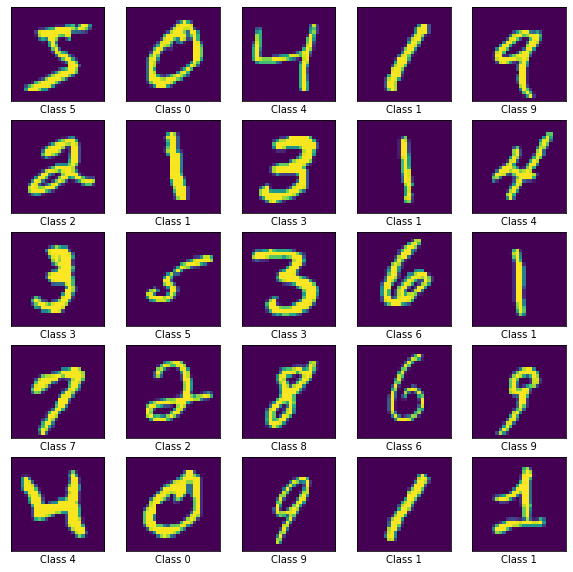

X_train shape: (50000, 784)
50000 train samples
10000 test samples
10000 validation samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
10/10 [==============================] - 1s 61ms/step - loss: 2.1114 - sparse_categorical_accuracy: 0.3975 - val_loss: 1.8066 - val_sparse_categorical_accuracy: 0.6377
Epoch 2/20
10/10 [==============================] - 0s 42ms/step - loss: 1.5267 - sparse_categorical_accuracy: 

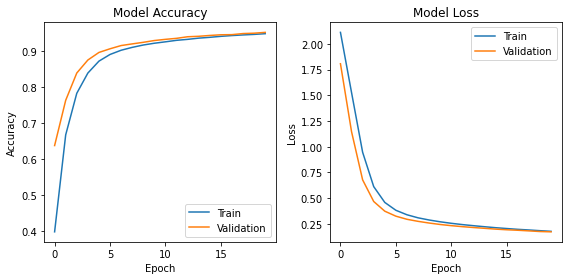

313/313 - 0s - loss: 0.1828 - sparse_categorical_accuracy: 0.9469
Test loss: 0.18, Test Accuracy: 94.69%


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                540850    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 547,600
Trainable params: 547,600
Non-trainable params: 0
________________________________________________

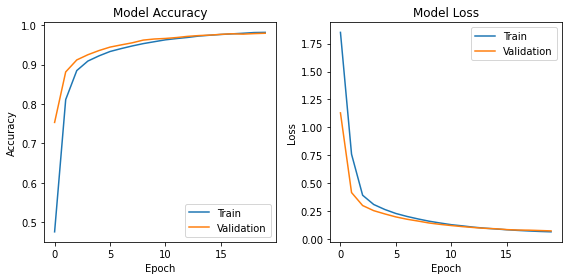

Test loss: 0.07, Test Accuracy: 97.74%
Size of each class of Training Set: 


FileNotFoundError: ignored

In [ ]:
# -*- coding: utf-8 -*-
"""
@author: Shaon Bhatta Shuvo
"""
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tfk
from sklearn import metrics 

#loading the datset from keras 
mnist = tfk.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() #X indiciates images and y indicates lables 

#Basic dataset info
print("Number of distict labels or classes: ", np.unique(y_test))
print("Number of train images: ",len(y_train))
print("Number of test images: ",len(y_test))

#some sample dataset images
print("Dataset Samples: ")
class_names = ['Class 0','Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],)
    plt.xlabel(class_names[y_train[i]])
plt.show()

#Data Rescaling: 
#All the images are consist of RGB values with pixel range from 0 to 255. However, we need to rescale 
#these values between 0 to 1, because values in range 0 to 255 would be too high for our model to process.
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train /= 255.0
X_test /= 255.0

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

# Reserve 10,000 samples for Validation Set
X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]

#Dataset info
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_val.shape[0], 'validation samples')

#convert class vectors to binary class matrices(we can avoid this step by using 'sparse_categorical_crossentropy' loss)
#num_classes = len(np.unique(y_test))
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
#y_val = keras.utils.to_categorical(y_val, num_classes)

#Creating the deep learning model 
model = tfk.Sequential()
model.add(tfk.layers.Dense(50,input_shape=(784,), activation='relu')) #First Hidden Layer
model.add(tfk.layers.Dense(100, activation='relu')) #Second  Hidden Layer
model.add(tfk.layers.Dense(10, activation='softmax')) #Output Layer
#model Looks like:  784 input -> [50 units in layer1] ->[100 units in layer2] -> 1 output

# Compiling the model  
model.compile(optimizer='adam',                         
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
#Model's Summary
model.summary()

#Training the model 
training = model.fit(X_train,y_train, epochs = 20, batch_size =5000, validation_data =(X_val,y_val))

#Visulaizing the Training and Validation Sets Loss and Accuracy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#Plot training and validation accuracy values
#axes[0].set_ylim(0,1) #if we want to limit axis in certain range
axes[0].plot(training.history['sparse_categorical_accuracy'], label='Train')
axes[0].plot(training.history['val_sparse_categorical_accuracy'], label='Validation')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
#Plot training and validation loss values
#axes[1].set_ylim(0,1)
axes[1].plot(training.history['loss'], label='Train')
axes[1].plot(training.history['val_loss'], label='Validation')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
plt.tight_layout()
plt.show()

# Evaluating the performance on the Test set 
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Test loss: {0:.2f}, Test Accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100)) 

########################################################################################
# CNN Implementation
########################################################################################
#Loading the dataset from Keras
mnist = tfk.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() #X indiciates images and y indicates lables 

# Data Preprocessing
#setting the input shape based on image data, if you work with color image then put 3 instead of 1. 
img_rows, img_cols = 28, 28
import keras.backend as K
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
# Reserve 10,000 samples for validation
X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]

#importing libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout,GlobalAveragePooling2D  
#Creating a CNN model with Dropout Regularization
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),input_shape=input_shape,activation='relu')) #First Convolutional Layer
#model.add(Conv2D(32, (3, 3), activation='relu')) #Second Convolutional Layer
model.add(MaxPooling2D(pool_size=(2, 2)))    #Max Pooling Layer
#model.add(Dropout(0.25))  #Adding Dropout Regularization 
model.add(Flatten())     #Flattening the matrix into vector 
model.add(Dense(50, activation='relu')) #Adding NN layer (Fully Connected Layer)
model.add(Dense(100, activation='relu')) #Adding One more hidden NN layer
#model.add(Dropout(0.5)) #Adding Dropout Regularization to the Fully Connected Layer 
model.add(Dense(10, activation='softmax')) #Output Layer

# Compiling the model  
model.compile(optimizer='adam',                         
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
#Model's Summary
model.summary()

#Training the model 
training = model.fit(X_train,y_train, epochs = 20, batch_size =5000, validation_data =(X_val,y_val))

#Visulaizing the Training and Validation Sets Loss and Accuracy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#Plot training and validation accuracy values
#axes[0].set_ylim(0,1) #if we want to limit axis in certain range
axes[0].plot(training.history['sparse_categorical_accuracy'], label='Train')
axes[0].plot(training.history['val_sparse_categorical_accuracy'], label='Validation')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
#Plot training and validation loss values
#axes[1].set_ylim(0,1)
axes[1].plot(training.history['loss'], label='Train')
axes[1].plot(training.history['val_loss'], label='Validation')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
plt.tight_layout()
plt.show()

# Evaluating the performance on the Test set 
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Test loss: {0:.2f}, Test Accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100)) 

# =============================================================================
# ###########################################################################################
# # CNN with Transfer Learning
# ###########################################################################################
# =============================================================================

# #importing libraries
import os
# Here's our 4 categories that we have to classify.
class_names = ['Bloodroot', 'Clubmoss', 'Dandelion', 'Lobelia']
###################
#Data Preprocessing
###################
#Counting the size of each classes in training, validation and testing dataset
# Traing Dataset
trainset = [class_names[0],class_names[1],class_names[2],class_names[3]] 
for i in range(len(class_names)):
    trainset[i] = os.path.join('Dataset/Train/',class_names[i])
print("Size of each class of Training Set: ")
for i in range(len(trainset)):
    print(class_names[i],' has ',len(os.listdir(trainset[i])), 'instances.')

#Validation Dataset
validationset = [class_names[0],class_names[1],class_names[2],class_names[3]] 
for i in range(len(class_names)):
    validationset[i] = os.path.join('Dataset/Validation/',class_names[i])
print("\nSize of each class of Validation Set: ")
for i in range(len(validationset)):
    print(class_names[i],' has ',len(os.listdir(validationset[i])), 'instances.')

#Test Dataset
testset = [class_names[0],class_names[1],class_names[2],class_names[3]] 
for i in range(len(class_names)):
    testset[i] = os.path.join('Dataset/Test/',class_names[i])
print("\nSize of each class of Test Set: ")
for i in range(len(testset)):
    print(class_names[i],' has ',len(os.listdir(validationset[i])), 'instances.')

#Plotting the pie chart to check the proporstion of train, validation and test set .
#Training, Testing and Validation set should be independent and identically distributed (iid)
sizes_trainset = []
for i in range(len(trainset)):
    sizes_trainset.append(len(os.listdir(trainset[i])))
explode = (0, 0, 0, 0)  
plt.pie(sizes_trainset, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category of Training set')
plt.show()

sizes_validationset = []
for i in range(len(trainset)):
    sizes_validationset.append(len(os.listdir(validationset[i])))
explode = (0, 0, 0, 0)  
plt.pie(sizes_validationset, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category of Validation set')
plt.show()

sizes_testset = []
for i in range(len(testset)):
    sizes_testset.append(len(os.listdir(testset[i])))
explode = (0, 0, 0, 0)  
plt.pie(sizes_testset, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category of Test set')
plt.show()

#Data Augmentation : to generate different shapes of images from the given data.(reduces overfitting)
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,    #Rescaling training data
                                   rotation_range=40,
                                   width_shift_range =0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#Rescaling validation and test dataset. 
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

#Since we have collected data from different sources of internet. Height and width  of every images are not same.
#However, we need to make each images of  same size in terms of height and width for purpose of train, validation and testing.               
IMG_WIDTH = 150
IMG_HEIGHT = 150  

OUTPUT_CLASSES = 4
BATCH_SIZE = 25
EPOCHS = 15
#Counting total training images (Summation of all classes)
total_train_images = 0;
for i in range(len(trainset)):
    total_train_images += len(os.listdir(trainset[i]))

STEPS_PER_EPOCH = np.ceil(total_train_images/BATCH_SIZE)

#Preparing the Training set
training_set = train_datagen.flow_from_directory(directory = 'Dataset/Train', #directory=str(data_dir)
                                                 target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')
#Preparing the Validation set
validation_set = validation_datagen.flow_from_directory(directory = 'Dataset/Validation',
                                                 target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')
#Preparing the Test set
test_set = test_datagen.flow_from_directory(directory = 'Dataset/Test',
                                            target_size = (IMG_HEIGHT, IMG_WIDTH),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

#displaying a portion of random batch images from the dataset
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.imshow(image_batch[i])
      for j in range(len(class_names)):
          if(label_batch[i][j]==1):
              plt.title(class_names[j])
              break;
      plt.axis('off')

image_batch, label_batch = next(training_set)
show_batch(image_batch, label_batch)

######################
#Model Implementation
#####################

#Creating the base pre-trained model using InceptV3
from keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False)
print(len(base_model.layers))
#Adding some more layer on top of pretained InceptV3 model
pretrained_model = base_model.output
extra_layer1 = GlobalAveragePooling2D()(pretrained_model) # Adding a global spatial average pooling layer
extra_layer2 = Dense(1024, activation='relu')(extra_layer1) # Adding a fully-connected layer
output_layer = Dense(OUTPUT_CLASSES, activation='softmax')(extra_layer2) #Output layer

# this is the model we will train
from keras.models import Model
model = Model(inputs=base_model.input, outputs=output_layer)
print(len(model.layers))

# we chose to train the top 2 inception blocks, i.e. we will freeze the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

#Model summary
model.summary()
#Model comiplation
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=[tfk.metrics.Precision(),tfk.metrics.Recall(),'accuracy'])

#Traing the model 
early_stopping = tfk.callbacks.EarlyStopping(patience =1)  #Early Stopping regularization
training = model.fit_generator(training_set,
                         steps_per_epoch = STEPS_PER_EPOCH,      #total_training_images/batch_size
                         epochs = 15,
                         validation_data = validation_set,
                         callbacks=[early_stopping])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#ploting training and validation accuracy values
axes[0].set_ylim(0,1)
axes[0].plot(training.history['accuracy'], label='Train')
axes[0].plot(training.history['val_accuracy'], label='Validation')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
#ploting training and validation loss values
#axes[1].set_ylim(0,1)
axes[1].plot(training.history['loss'], label='Train')
axes[1].plot(training.history['val_loss'], label='Validation')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
plt.tight_layout()
plt.show()

#Storing precision and recall valuses from learning.history()
learning_list = list(training.history.keys())
precision = learning_list[5]
recall = learning_list[6]
val_precision = learning_list[1]
val_recall = learning_list[2]

fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#ploting training and validation precision values
axes1[0].set_ylim(0,1)
axes1[0].plot(training.history[precision], label='Train')
axes1[0].plot(training.history[val_precision], label='Validation')
axes1[0].set_title('Model Precision')
axes1[0].set_xlabel('Epoch')
axes1[0].set_ylabel('Precision')
axes1[0].legend()
#ploting training and validation recall values
axes1[1].set_ylim(0,1)
axes1[1].plot(training.history[recall], label='Train')
axes1[1].plot(training.history[val_recall], label='Validation')
axes1[1].set_title('Model Recall')
axes1[1].set_xlabel('Epoch')
axes1[1].set_ylabel('Recall')
axes1[1].legend()
plt.tight_layout()
plt.show()
########################
#Performance Evaluation
########################
print("Evaluate on test data")
test_loss, test_precision, test_recall,  test_accuracy  = model.evaluate(test_set, verbose=0)
print("Test Loss: {0:.2f}, Test Precision: {1:.2f}, Test Recall: {2:.2f}, Test Accuracy: {3:.2f}%".format(test_loss,test_precision,test_recall, test_accuracy*100))